# MODEL

In [732]:
# importando las librerias
import numpy as np
import pandas as pd
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
# plots
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
from scipy.stats import norm, skew #for some statistics
%matplotlib inline 
import statsmodels.api as sm

from sklearn.model_selection import cross_val_score

# MODELS
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# ANN
from sklearn.neural_network import MLPRegressor



In [733]:
XC = pd.read_csv('./pre/XC.csv')
XD = pd.read_csv('./pre/XD.csv')

In [734]:
# XC.head(10)
XD.head(3)

,amoblado,bathroom,baulera,bedroom,dimension_built,dimension_ground,elevator,garage,latitud,longitud,price,status,year_built,riesgo__alto,riesgo__bajo,riesgo__moderado,riesgo__muy bajo,neighborhood_encoded
0,0,1.0,0,3.0,85,0,0,1,-16.527618,-68.053825,89000.0,1,2017.0,1,0,0,0,1
1,0,2.0,0,2.0,83,0,0,1,-16.514166,-68.084206,83000.0,2,2002.0,0,1,0,0,2
2,0,3.0,0,4.0,128,0,1,1,-16.539625,-68.047394,105000.0,1,2016.0,0,1,0,0,3


Skewness of SalePrice:  2.03064405461169


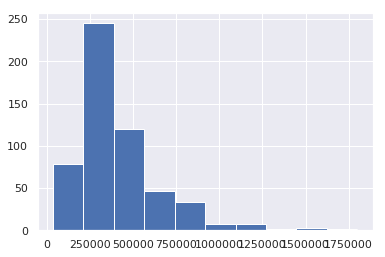

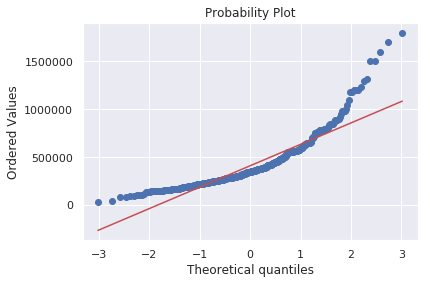

In [735]:
# Calculating and plotting the skewness of SalePrice

print("Skewness of SalePrice: ", XC.price.skew())
plt.hist(XC.price)
plt.show()

fig = plt.figure()
res = stats.probplot(XC['price'], plot=plt)
plt.show()

## DEPARTMANTO

Skewness of SalePrice:  1.6811824829129427


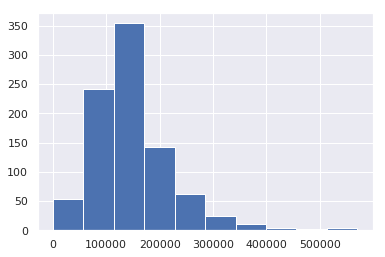

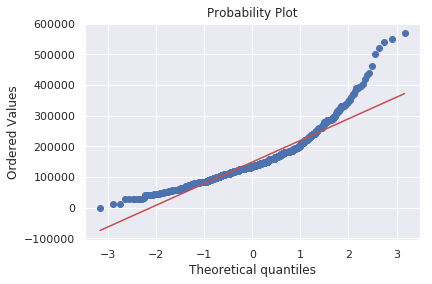

In [736]:
# departamento

# Calculating and plotting the skewness of SalePrice

print("Skewness of SalePrice: ", XD.price.skew())
plt.hist(XD.price)
plt.show()

fig = plt.figure()
res = stats.probplot(XD['price'], plot=plt)
plt.show()

In [737]:
# Calculating the correlation between each feature and SalePrice
corr = XD.corr()
print(corr['price'].sort_values(ascending=False)[:])

price                   1.000000
dimension_built         0.727803
bathroom                0.636952
garage                  0.509420
bedroom                 0.509089
riesgo__bajo            0.206613
status                  0.099966
baulera                 0.075409
amoblado                0.040313
elevator                0.034142
riesgo__muy bajo        0.002992
dimension_ground       -0.001495
latitud                -0.009141
neighborhood_encoded   -0.045885
riesgo__moderado       -0.064868
longitud               -0.069023
year_built             -0.107453
riesgo__alto           -0.145015
Name: price, dtype: float64


In [738]:
# Taking log of SalePrice to remove the skewness and plotting it

# XC['SalePrice_Skew'] = np.log(XC['price']+1)
# print("Skewness of SalePrice: ", XC['SalePrice_Skew'].skew())
# plt.hist(XC['SalePrice_Skew'], color='red')
# plt.show()

# fig = plt.figure()
# res = stats.probplot(XC['SalePrice_Skew'], plot=plt)
# plt.show()

In [739]:
# Calculating the correlation between each feature and SalePrice
corr = XC.corr()
print(corr['price'].sort_values(ascending=False)[:])

price                   1.000000
dimension_ground        0.628262
dimension_built         0.541057
bathroom                0.386900
garage                  0.349054
bedroom                 0.249652
status                  0.218177
riesgo__bajo            0.124615
riesgo__moderado        0.072891
amoblado                0.060028
baulera                 0.045925
neighborhood_encoded    0.034170
riesgo__muy bajo        0.032901
latitud                -0.112347
longitud               -0.156784
riesgo__alto           -0.187933
year_built             -0.286461
Name: price, dtype: float64


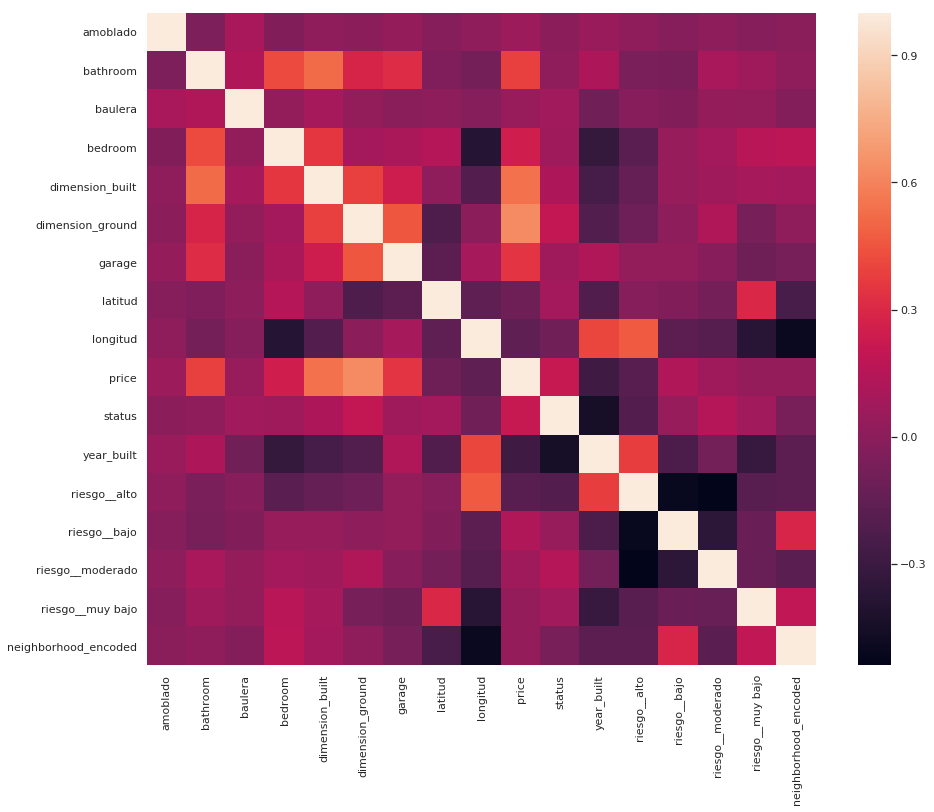

In [740]:
# Plotting the correlation heat map
f, ax = plt.subplots(figsize=(15, 12))
sb.heatmap(corr)
plt.show()

# casa

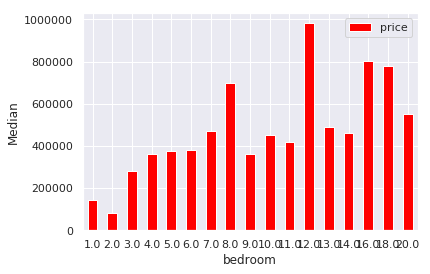

In [741]:
# Analyzing the Overall Quality feature with respect to SalePrice
XC.dimension_built.unique()
pivot = XC.pivot_table(index='bedroom', values='price', aggfunc=np.median)

pivot.plot(kind='bar', color='red')
plt.xlabel('bedroom')
plt.ylabel('Median')
plt.xticks(rotation=0)
plt.show()

# depar

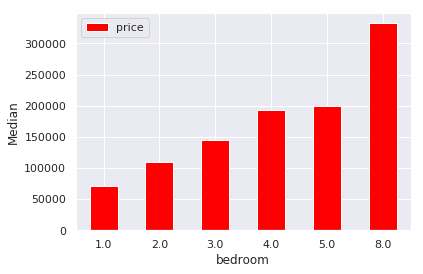

In [742]:
# Analyzing the Overall Quality feature with respect to SalePrice
XD.dimension_built.unique()
pivot = XD.pivot_table(index='bedroom', values='price', aggfunc=np.median)

pivot.plot(kind='bar', color='red')
plt.xlabel('bedroom')
plt.ylabel('Median')
plt.xticks(rotation=0)
plt.show()

# caasa

/opt/anaconda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


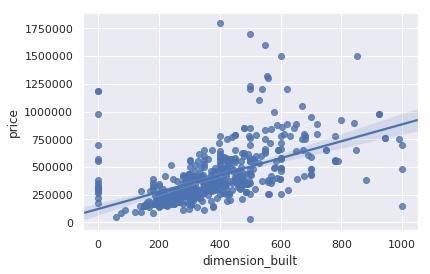

In [743]:
# Analyzing the dimension_built feature with respect to SalePrice
sb.regplot(x='dimension_built', y='price', data=XC)

# departa

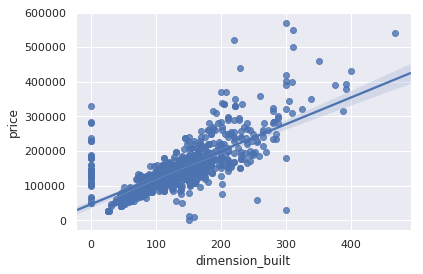

In [744]:
# Analyzing the dimension_built feature with respect to SalePrice
sb.regplot(x='dimension_built', y='price', data=XD)

In [745]:
XD[XD.dimension_built>=1000]['dimension_built'].unique()

array([], dtype=int64)

In [746]:
XD[XD.price>600000]['price'].unique()

array([], dtype=float64)

In [747]:
XC[XC.price>900000]['price'].unique()

array([1320000.,  980000., 1000000., 1050000., 1100000.,  950000.,
       1600000., 1500000., 1300000., 1230000., 1200000.,  920000.,
       1700000., 1800000., 1183000.])

# casa

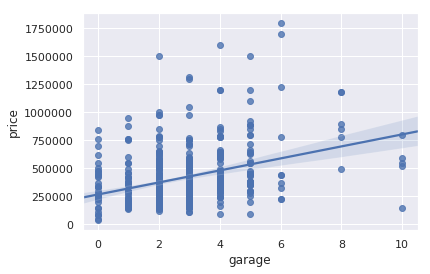

In [748]:
# Analyzing the garage feature with respect to SalePrice
sb.regplot(x='garage', y='price', data=XC)

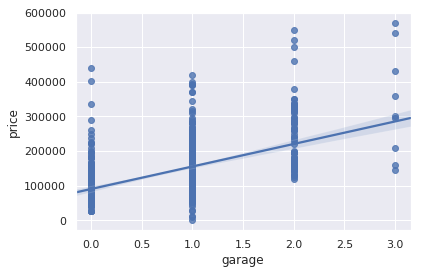

In [749]:
# depar

# Analyzing the garage feature with respect to SalePrice
sb.regplot(x='garage', y='price', data=XD)

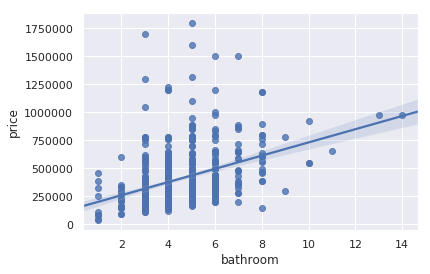

In [750]:
# Analyzing the bathroom feature with respect to SalePrice
sb.regplot(x='bathroom', y='price', data=XC)

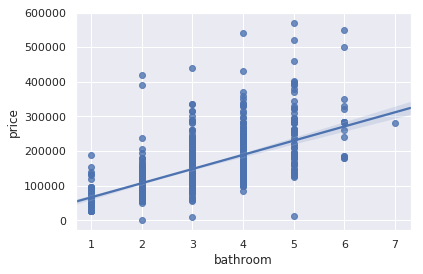

In [751]:
# Analyzing the bathroom feature with respect to SalePrice
sb.regplot(x='bathroom', y='price', data=XD)

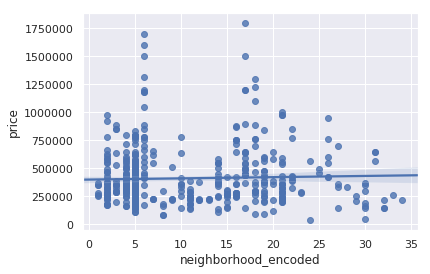

In [752]:
# Analyzing the neighborhood_encoded feature with respect to SalePrice
sb.regplot(x='neighborhood_encoded', y='price', data=XC)

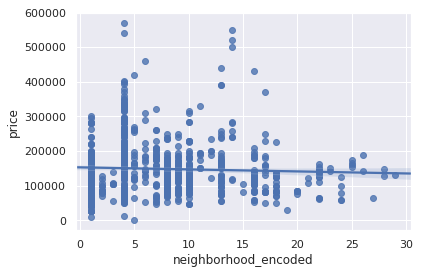

In [753]:
# Analyzing the neighborhood_encoded feature with respect to SalePrice
sb.regplot(x='neighborhood_encoded', y='price', data=XD)

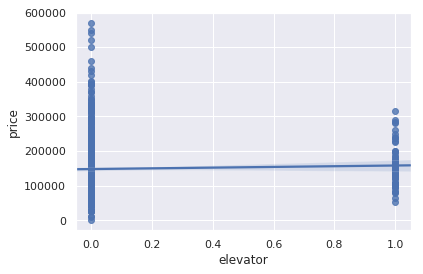

In [754]:
# Analyzing the elevator feature with respect to SalePrice
sb.regplot(x='elevator', y='price', data=XD)

In [755]:
# XC.columns

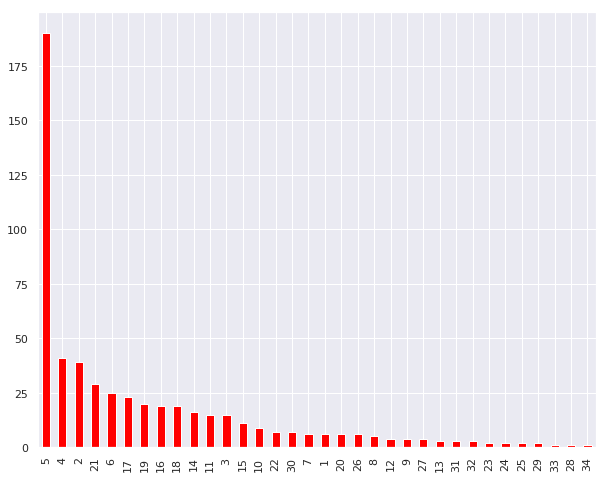

In [756]:
# Plotting the number of houses according to the Neighborhood of the house
f, ax = plt.subplots(figsize=(10, 8))
XC['neighborhood_encoded'].value_counts().plot(kind='bar', color='red')

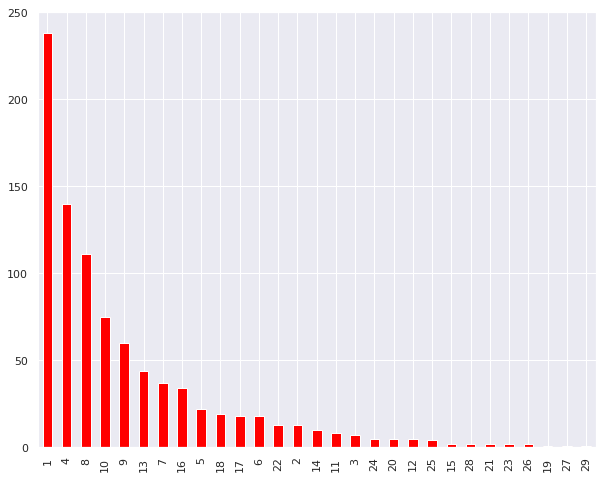

In [757]:
# Plotting the number of houses according to the Neighborhood of the house
f, ax = plt.subplots(figsize=(10, 8))
XD['neighborhood_encoded'].value_counts().plot(kind='bar', color='red')

In [758]:
# Plotting the Neighborhood houses with respect to the skewed Sales Price
# g = sb.factorplot(x='neighborhood_encoded', y='SalePrice_Skew', data=XC, kind='strip', aspect=3, )
# g.set_xticklabels(rotation=90)


In [759]:
# Plotting the Sale Condition of houses with respect to Skewed Sales Price
# g = sb.factorplot(x='bedroom', y='SalePrice_Skew', data=XC, kind='point', aspect=3, )
# g.set_xticklabels(rotation=90)

In [760]:
# Finding all the missing values in the dataset and then calculating the missing ratio of each feature
all_data = (XC.isnull().sum() / len(XC)) * 100
all_data = all_data.drop(all_data[all_data == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data})
missing_data.head(10)

,Missing Ratio
year_built,53.113553
bedroom,0.549451
bathroom,0.549451


In [761]:
# DEPARTA

# Finding all the missing values in the dataset and then calculating the missing ratio of each feature
all_data = (XD.isnull().sum() / len(XD)) * 100
all_data = all_data.drop(all_data[all_data == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data})
missing_data.head(10)

,Missing Ratio
year_built,57.063404
bathroom,0.556174
bedroom,0.333704


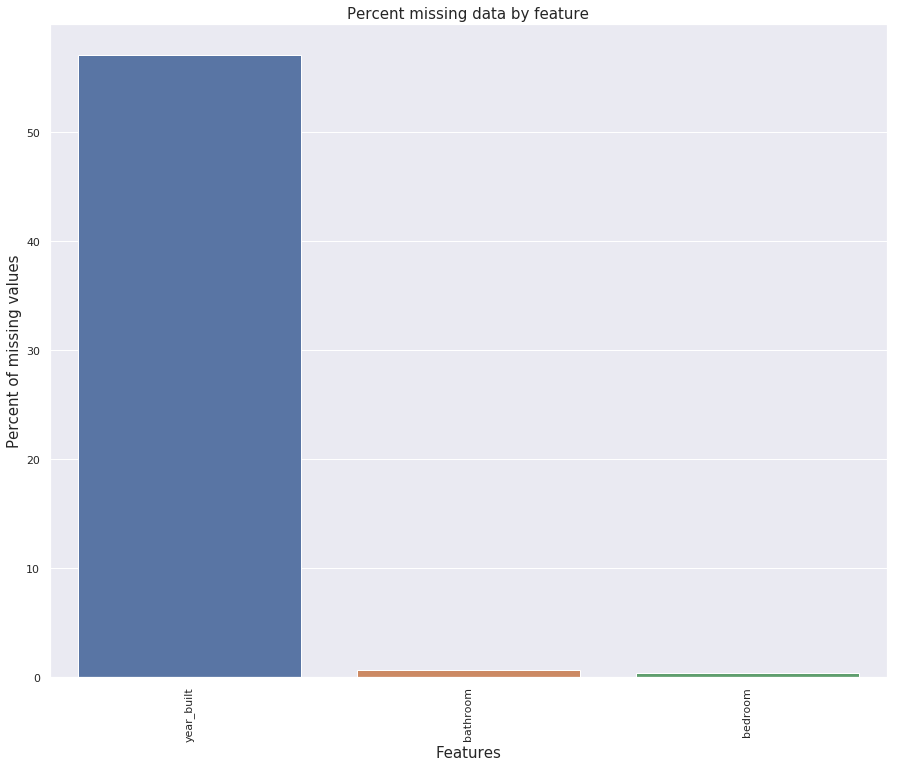

In [762]:
# Plotting the missing ratio of data by feature
f, ax = plt.subplots(figsize=(15, 12))
sb.barplot(x=all_data.index, y=all_data)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.xticks(rotation='90')
plt.show()

In [763]:
# # Removing the outliers
# data = XC.drop(XC[(XC['dimension_built']>4000) & (data['SalePrice']<300000)].index)
# sb.regplot(x='Gr_Liv_Area', y='SalePrice', data=XC)

## comparing dimension_built	dimension_ground dimensions

In [764]:
#  dimension_built	dimension_ground dimensions
XC[XC['dimension_built']!=XC['dimension_ground']].shape

(528, 17)

In [765]:
## Parsing zero to NaN - dimension_ground

In [766]:
XC['dimension_ground'].replace (0, np.nan, inplace = True)

In [767]:
XD['dimension_ground'].replace (0, np.nan, inplace = True)

In [768]:
## Parsing zero to NaN - dimension_built

In [769]:
XC['dimension_built'].replace (0, np.nan, inplace = True)

In [770]:
XD['dimension_built'].replace (0, np.nan, inplace = True)

In [771]:
XC[XC['dimension_built']>XC['dimension_ground']].shape

(215, 17)

### **IMPUTACION**

In [776]:
# XC.notnull().apply(pd.Series.value_counts)
# XD.notnull().apply(pd.Series.value_counts)

In [777]:
# imputer = Imputer(missing_values=np.nan, strategy='mean', axis=1)
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [778]:
valuesC = imputer.fit_transform(XC)
valuesD = imputer.fit_transform(XD)

In [779]:
# datos sin Nans
# valuesC
valuesD

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 2., 0., ..., 0., 0., 2.],
       [0., 3., 0., ..., 0., 0., 3.],
       ...,
       [0., 3., 0., ..., 1., 0., 9.],
       [0., 5., 1., ..., 1., 0., 9.],
       [0., 4., 1., ..., 1., 0., 8.]])

In [780]:
# datos con NaNs...
# XC.values
# XD.values

In [781]:
# llevando este array a un Dataframe
Xc = pd.DataFrame(valuesC)
Xd = pd.DataFrame(valuesD)

In [782]:
# xx = XC[['amoblado', 'bathroom', 'baulera', 'bedroom', 'dimension_built', 'dimension_ground', 'garage', 'latitud', 'longitud', 'status', 'year_built', 'riesgo__alto', 'riesgo__bajo', 'riesgo__moderado', 'riesgo__muy bajo', 'neighborhood_encoded']]
# yy = XC['price']

# X0 = sm.add_constant(xx)
# est = sm.OLS(yy, X0).fit()

# est.summary()


In [783]:
# DEPARTAMENTO
# X = X[['amoblado', 'bathroom', 'baulera', 'bedroom', 'dimension_built', 'dimension_ground', 'elevator', 'garage', '']]

In [784]:
# NOS DA CANTIDAD DE NULOS QUE EXISTE, O LO TIENEN EN CERO (0)
(XC !=0).apply(pd.Series.value_counts)

,amoblado,bathroom,baulera,bedroom,dimension_built,dimension_ground,garage,latitud,longitud,price,status,year_built,riesgo__alto,riesgo__bajo,riesgo__moderado,riesgo__muy bajo,neighborhood_encoded
False,540,NaN,533,NaN,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,310,409,395,524,NaN
True,6,546.0,13,546.0,546.0,546.0,513,546.0,546.0,546.0,546.0,546.0,236,137,151,22,546.0


In [785]:
ava = ((XC !=0) & XC.notnull())
# ava
ava.all(axis=1).value_counts()

False    546
dtype: int64

In [786]:
df1 = XC[XC.isna().any(axis=1)]
df1.shape

(299, 17)

In [787]:

# null_columns=XC.columns[XC.isnull().any()]
# XC[null_columns].isnull().sum()

# print(XC[XC["dimension_ground"].isnull()][null_columns])

### **ADDED LABELS TO DATASET**

In [788]:
Xc.columns = XC.columns
Xd.columns = XD.columns

In [789]:
# Xc.columns
Xd.columns

Index(['amoblado', 'bathroom', 'baulera', 'bedroom', 'dimension_built',
       'dimension_ground', 'elevator', 'garage', 'latitud', 'longitud',
       'price', 'status', 'year_built', 'riesgo__alto', 'riesgo__bajo',
       'riesgo__moderado', 'riesgo__muy bajo', 'neighborhood_encoded'],
      dtype='object')

In [790]:
Xc.sample(3)
# Xd.head(3)

,amoblado,bathroom,baulera,bedroom,dimension_built,dimension_ground,garage,latitud,longitud,price,status,year_built,riesgo__alto,riesgo__bajo,riesgo__moderado,riesgo__muy bajo,neighborhood_encoded
534,0.0,6.0,0.0,5.0,450.0,300.0,2.0,-16.519045,-68.060539,413000.0,1.0,2015.0,1.0,0.0,0.0,0.0,5.0
145,0.0,3.0,0.0,4.0,205.0,219.0,2.0,-16.563457,-68.105331,211000.0,1.0,2019.0,1.0,0.0,0.0,0.0,21.0
442,1.0,3.0,0.0,4.0,440.0,500.0,2.0,-16.566183,-68.101295,358000.0,2.0,2019.0,1.0,0.0,0.0,0.0,21.0


In [791]:
# Calculating the missing ratio again to check if any missing data has been left out
all_data = (XC.isnull().sum() / len(XC)) * 100
all_data = all_data.drop(all_data[all_data == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data})
missing_data.head(20)

,Missing Ratio
year_built,53.113553
dimension_ground,2.930403
dimension_built,2.930403
bedroom,0.549451
bathroom,0.549451


In [792]:
#  depara
# Calculating the missing ratio again to check if any missing data has been left out
all_data = (XD.isnull().sum() / len(XD)) * 100
all_data = all_data.drop(all_data[all_data == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data})
missing_data.head(20)

,Missing Ratio
dimension_ground,90.989989
year_built,57.063404
dimension_built,5.784205
bathroom,0.556174
bedroom,0.333704


### OLS

In [793]:
xx = Xc[['amoblado', 'bathroom', 'baulera', 'bedroom', 'dimension_built', 'dimension_ground', 'garage', 'latitud', 'longitud', 'status', 
        'year_built', 'riesgo__alto', 'riesgo__bajo', 'riesgo__moderado', 'riesgo__muy bajo', 'neighborhood_encoded']]
yy = Xc['price']

X0 = sm.add_constant(xx)
est = sm.OLS(yy, X0).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     48.41
Date:                Sat, 18 May 2019   Prob (F-statistic):           4.66e-89
Time:                        18:32:59   Log-Likelihood:                -7312.9
No. Observations:                 546   AIC:                         1.466e+04
Df Residuals:                     530   BIC:                         1.473e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.052e+07   2.65e+07     -3.037      0.003   -1.33e+08   -2.84e+07
amoblado              1.356e+05   6.68e+04      2.029      0.043    4331.325    2.67e+05
bathroom              8352.4439   5897.063      1.416      0.157   -3232.041    1.99e+04
baulera              -2.593e+04   4.63e+04     -0.560      0.576   -1.17e+05    6.51e+04
bedroom               4219.7757   4383.468      0.963      0.336   -4391.328    1.28e+04
dimension_built        488.0000     58.881      8.288      0.000     372.332     603.668
dimension_ground       395.5867     31.533     12.545      0.000     333.641     457.532
garage                3144.7541   5145.468      0.611      0.541   -6963.260    1.33e+04
latitud              -8.949e+05   3.98e+05     -2.251      0.025   -1.68e+06   -1.14e+05
longitud              -1.27e+06   4.55e+05     -2.792      0.005   -2.16e+06   -3.76e+05
status                4.224e+04   1.87e+04      2.264      0.024    5586.402    7.89e+04
year_built            -316.3795    641.624     -0.493      0.622   -1576.818     944.059
riesgo__alto         -2.015e+07   6.62e+06     -3.042      0.002   -3.32e+07   -7.14e+06
riesgo__bajo         -2.009e+07   6.63e+06     -3.032      0.003   -3.31e+07   -7.08e+06
riesgo__moderado     -2.017e+07   6.63e+06     -3.042      0.002   -3.32e+07   -7.15e+06
riesgo__muy bajo     -2.011e+07   6.63e+06     -3.032      0.003   -3.31e+07   -7.08e+06
neighborhood_encoded -3995.1944   1230.373     -3.247      0.001   -6412.201   -1578.188
==============================================================================
Omnibus:                      209.830   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10671.645
Skew:                          -0.874   Prob(JB):                         0.00
Kurtosis:                      24.588   Cond. No.                     4.40e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.24e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [796]:
xx1 = Xd[['amoblado', 'bathroom', 'baulera', 'bedroom', 'dimension_built', 'dimension_ground','elevator', 'garage', 'latitud', 'longitud', 'status', 
        'year_built', 'riesgo__alto', 'riesgo__bajo', 'riesgo__moderado', 'riesgo__muy bajo', 'neighborhood_encoded']]
yy1 = Xd['price']

X0 = sm.add_constant(xx1)
est = sm.OLS(yy1, X0).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     143.5
Date:                Sat, 18 May 2019   Prob (F-statistic):          2.32e-232
Time:                        18:34:44   Log-Likelihood:                -10786.
No. Observations:                 899   AIC:                         2.161e+04
Df Residuals:                     882   BIC:                         2.169e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.484e+06   2.36e+06     -1.477      0.140   -8.11e+06    1.15e+06
amoblado               6.39e+04   2.88e+04      2.222      0.027    7447.367     1.2e+05
bathroom              9258.4419   1830.664      5.057      0.000    5665.477    1.29e+04
baulera              -3860.9050   4738.348     -0.815      0.415   -1.32e+04    5438.849
bedroom              -3070.5358   2284.256     -1.344      0.179   -7553.747    1412.676
dimension_built        817.2168     33.047     24.729      0.000     752.356     882.077
dimension_ground        -0.1006      0.288     -0.349      0.727      -0.667       0.465
elevator              -631.7620   5988.023     -0.106      0.916   -1.24e+04    1.11e+04
garage                1.222e+04   2775.271      4.404      0.000    6774.325    1.77e+04
latitud               -751.4321   1214.685     -0.619      0.536   -3135.443    1632.578
longitud              -4.99e+04   4.22e+04     -1.183      0.237   -1.33e+05    3.29e+04
status                -982.6442   2991.478     -0.328      0.743   -6853.890    4888.602
year_built             475.4611    248.223      1.915      0.056     -11.716     962.638
riesgo__alto         -8.917e+05   5.89e+05     -1.514      0.130   -2.05e+06    2.64e+05
riesgo__bajo         -8.581e+05    5.9e+05     -1.455      0.146   -2.02e+06       3e+05
riesgo__moderado     -8.707e+05    5.9e+05     -1.477      0.140   -2.03e+06    2.86e+05
riesgo__muy bajo     -8.636e+05   5.91e+05     -1.462      0.144   -2.02e+06    2.96e+05
neighborhood_encoded -1014.7684    298.761     -3.397      0.001   -1601.134    -428.403
==============================================================================
Omnibus:                      295.463   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3814.198
Skew:                           1.118   Prob(JB):                         0.00
Kurtosis:                      12.840   Cond. No.                     8.42e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.73e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [798]:
# XD.head()

In [799]:
# from sklearn.preprocessing import StandardScaler
# scale = StandardScaler()

# X = XC.loc[:,('amoblado', 'bathroom', 'baulera', 'bedroom', 'dimension_built', 'dimension_ground', 'garage', 'latitud', 'longitud',
#               'status', 'year_built', 'riesgo__alto', 'riesgo__bajo', 'riesgo__moderado', 'riesgo__muy bajo', 'neighborhood_encoded')]

# y = XC['price']

# X[['amoblado', 'bathroom', 'baulera', 'bedroom', 'dimension_built', 'dimension_ground', 'garage', 'latitud', 'longitud',
#               'status', 'year_built', 'riesgo__alto', 'riesgo__bajo', 'riesgo__moderado', 'riesgo__muy bajo', 'neighborhood_encoded']] = scale.fit_transform(X[['amoblado', 'bathroom', 'baulera', 'bedroom', 'dimension_built', 'dimension_ground', 'garage', 'latitud', 'longitud',
#               'status', 'year_built', 'riesgo__alto', 'riesgo__bajo', 'riesgo__moderado', 'riesgo__muy bajo', 'neighborhood_encoded']].as_matrix())

# est = sm.OLS(y, X).fit()

# est.summary()

In [801]:
XC_sub = XC[['amoblado', 'bathroom', 'baulera', 'bedroom', 'dimension_built', 'dimension_ground', 'garage', 'latitud', 'longitud',
              'status', 'year_built', 'riesgo__alto', 'riesgo__bajo', 'riesgo__moderado', 'riesgo__muy bajo', 'neighborhood_encoded']]
XC_sub.corr() 

# -------------
XD_sub = XD[['amoblado', 'bathroom', 'baulera', 'bedroom', 'dimension_built', 'dimension_ground', 'elevator','garage', 'latitud', 'longitud',
              'status', 'year_built', 'riesgo__alto', 'riesgo__bajo', 'riesgo__moderado', 'riesgo__muy bajo', 'neighborhood_encoded']]
XD_sub.corr() 

,amoblado,bathroom,baulera,bedroom,dimension_built,dimension_ground,elevator,garage,latitud,longitud,status,year_built,riesgo__alto,riesgo__bajo,riesgo__moderado,riesgo__muy bajo,neighborhood_encoded
amoblado,1.000000,-0.041498,0.130553,-0.012927,0.010278,NaN,0.176573,0.008354,-0.001657,0.011396,0.031676,-0.014638,0.023096,0.019757,-0.034510,-0.012400,-0.037840
bathroom,-0.041498,1.000000,0.159090,0.658039,0.731738,0.117197,-0.000542,0.474382,-0.002370,0.016318,0.131436,-0.126207,0.030692,0.043213,-0.048303,-0.043364,-0.148330
baulera,0.130553,0.159090,1.000000,0.082333,0.107994,0.128720,0.404933,0.081831,-0.012703,0.055209,0.122350,-0.001085,0.099479,-0.052242,-0.016127,-0.052515,-0.066157
bedroom,-0.012927,0.658039,0.082333,1.000000,0.643606,0.036423,0.074684,0.284999,0.010991,-0.083789,0.185217,-0.261011,-0.017761,-0.010763,0.025448,0.003222,0.010277
dimension_built,0.010278,0.731738,0.107994,0.643606,1.000000,0.723250,0.050671,0.522380,0.002939,-0.036649,0.139338,-0.201538,-0.057707,0.109514,-0.054699,0.002802,-0.018379
dimension_ground,NaN,0.117197,0.128720,0.036423,0.723250,1.000000,-0.039484,0.001709,0.029326,0.057499,0.024813,1.000000,0.138838,-0.051613,-0.087933,-0.025928,-0.103104
elevator,0.176573,-0.000542,0.404933,0.074684,0.050671,-0.039484,1.000000,0.047311,-0.009174,0.023015,-0.022922,0.060685,-0.027970,-0.033051,0.075877,-0.033944,0.009851
garage,0.008354,0.474382,0.081831,0.284999,0.522380,0.001709,0.047311,1.000000,0.003904,0.073246,0.021127,0.064141,0.063822,0.002275,-0.046404,-0.030974,-0.184131
latitud,-0.001657,-0.002370,-0.012703,0.010991,0.002939,0.029326,-0.009174,0.003904,1.000000,-0.036704,0.023093,-0.180720,-0.018216,-0.026107,-0.026042,0.132819,0.052380
longitud,0.011396,0.016318,0.055209,-0.083789,-0.036649,0.057499,0.023015,0.073246,-0.036704,1.000000,-0.032269,0.360752,0.383683,-0.142049,-0.071120,-0.296863,-0.345447


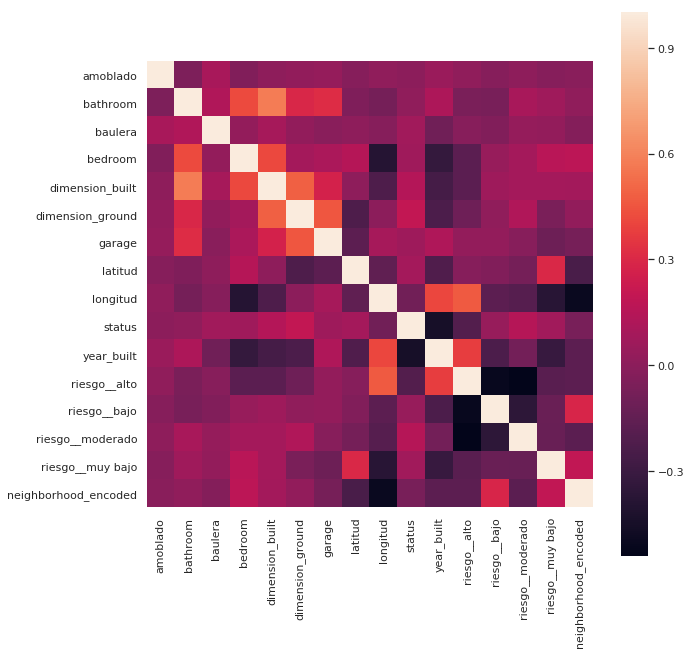

In [529]:
corrmat = XC_sub.corr()
f, ax = plt.subplots(figsize=(10, 10))
sb.heatmap(corrmat, vmax=1, square=True);
plt.show()


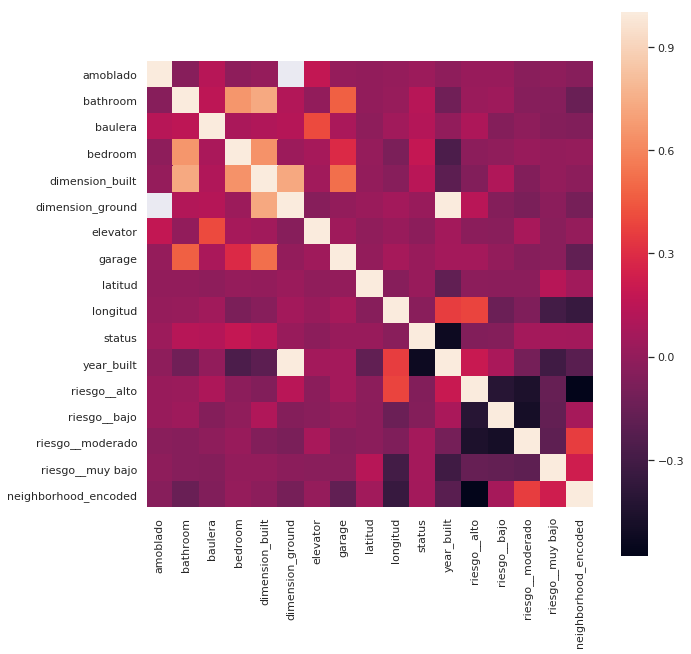

In [802]:
corrmat = XD_sub.corr()
f, ax = plt.subplots(figsize=(10, 10))
sb.heatmap(corrmat, vmax=1, square=True);
plt.show()


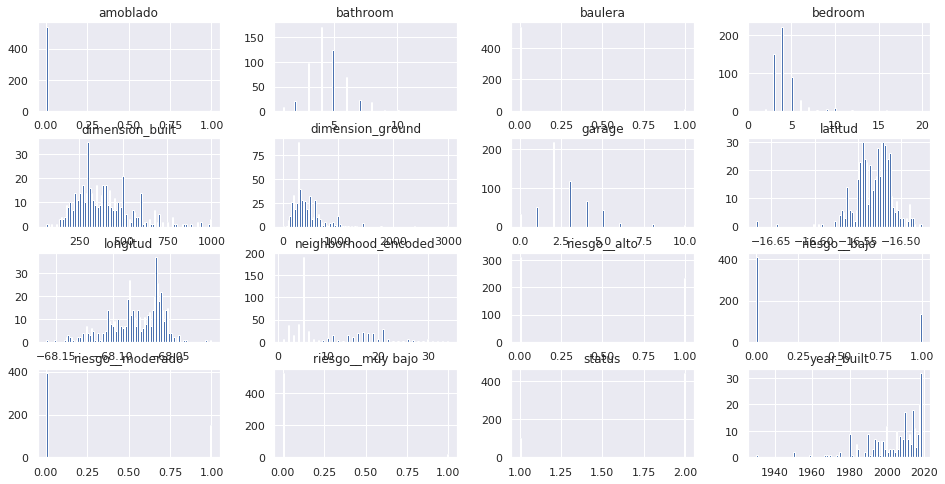

In [532]:
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0]=16.0
fig_size[1]=8.0
XC_sub.hist(bins=100)
plt.show()

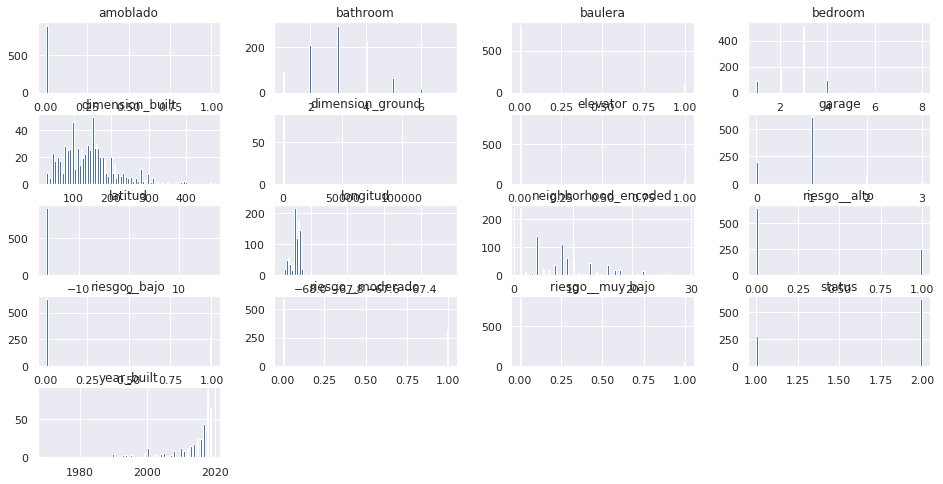

In [803]:
# DEPARTAME
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0]=16.0
fig_size[1]=8.0
XD_sub.hist(bins=100)
plt.show()

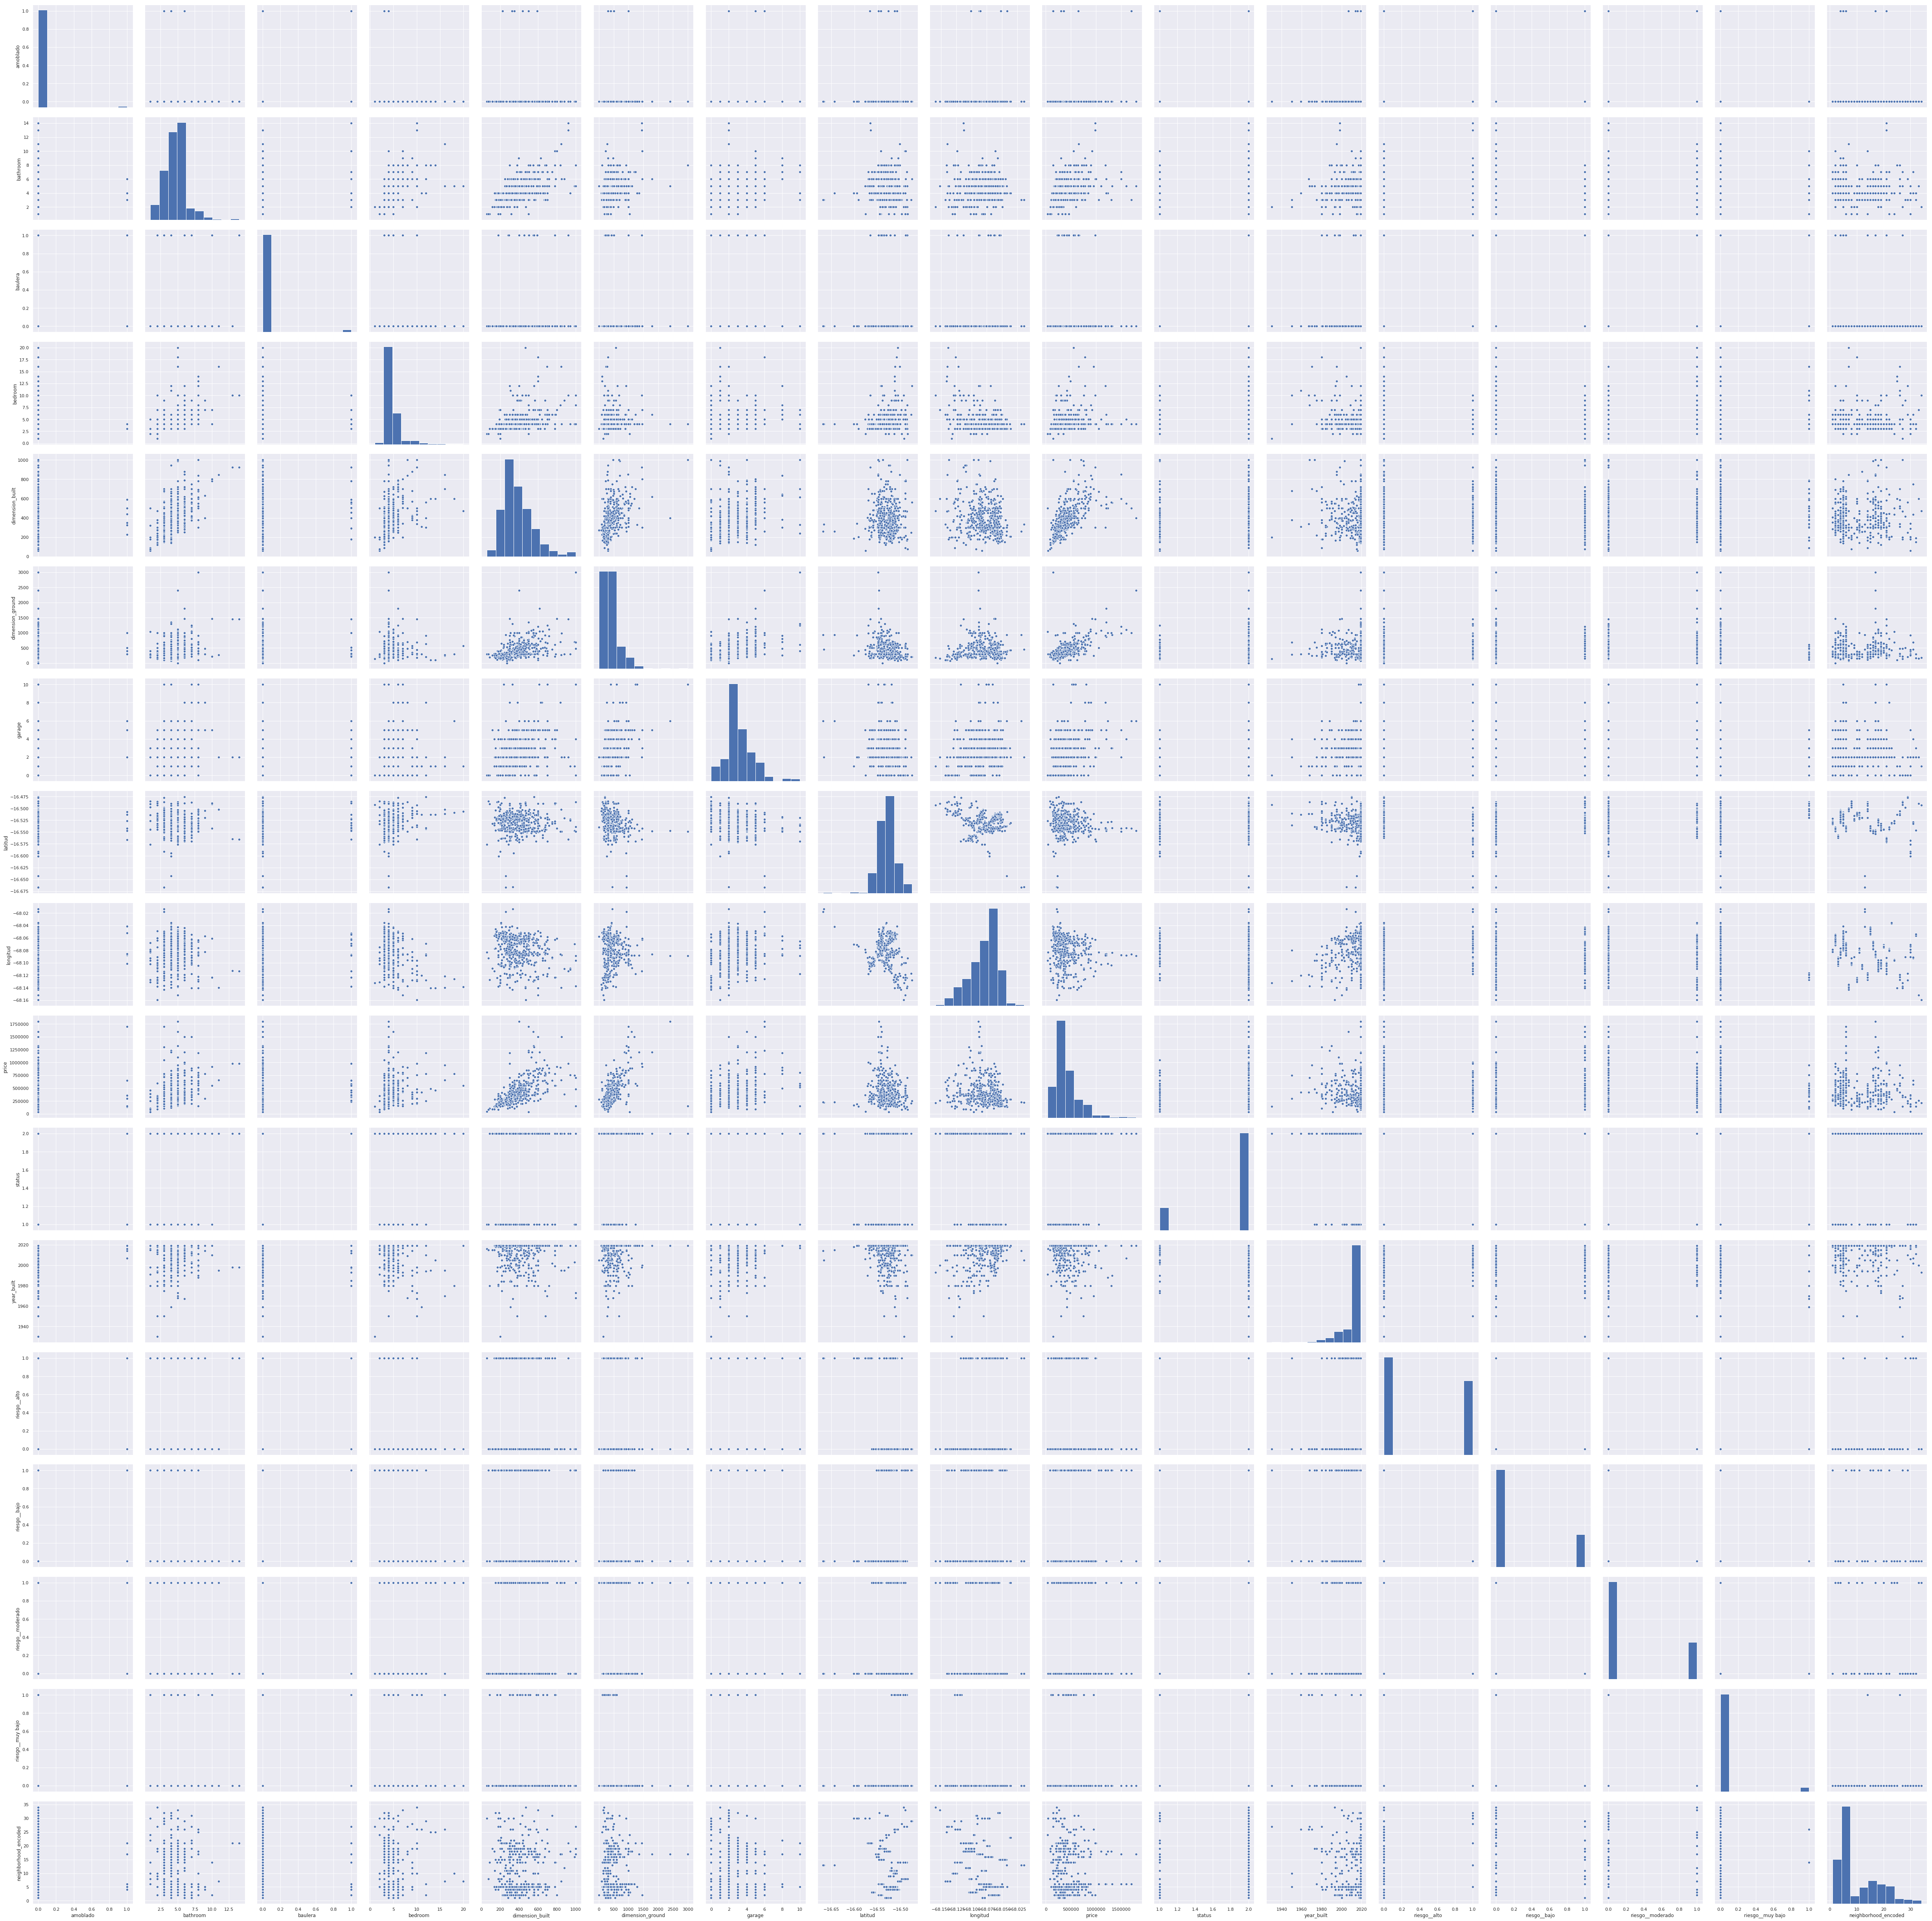

In [533]:
sb.set()
cols = Xc.columns
sb.pairplot(Xc[cols], height = 4)
plt.show();

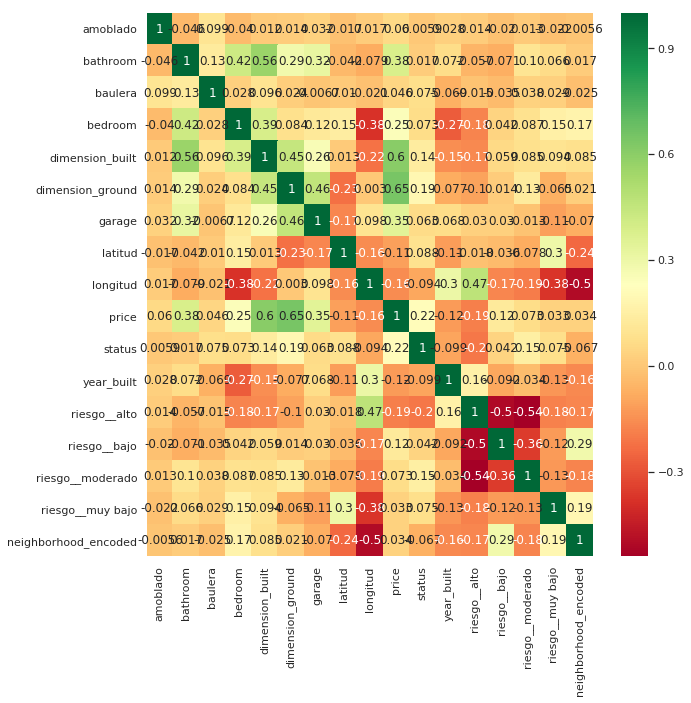

In [534]:
# most correlated features
corrmat = Xc.corr()
top_corr_features = corrmat.index[abs(corrmat["price"])>0]
plt.figure(figsize=(10,10))
g = sb.heatmap(Xc[top_corr_features].corr(),annot=True,cmap="RdYlGn")

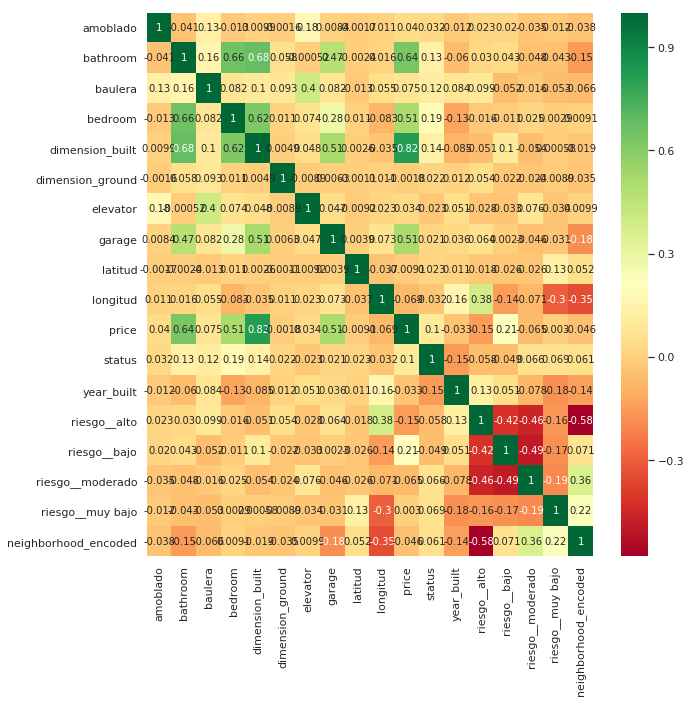

In [805]:
#  DEPAR
# most correlated features
corrmat = Xd.corr()
top_corr_features = corrmat.index[abs(corrmat["price"])>0]
plt.figure(figsize=(10,10))
g = sb.heatmap(Xd[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [535]:
Yc = Xc['price']
Yd = Xd['price']

In [536]:
Xc = Xc.drop('price', axis = 1)
Xd = Xd.drop('price', axis = 1)

In [537]:
# Yc.head()
# Yd.head()

# Yc.shape
# Yd.shape

# PLOTS

# splitting data

In [538]:
# 50% en train    |   50% en test
XC_train, XC_test, YC_train, YC_test = train_test_split(Xc, Yc, test_size = 0.5, random_state=1)
XD_train, XD_test, YD_train, YD_test = train_test_split(Xd, Yd, test_size = 0.5, random_state=1)

##  **MODELS**

   - LinearRegression,
   - Ridge,
   - Lasso,
   - ElasticNet,
   - KNeighborsRegressor,
   - DecisionTreeRegressor,
   - SVR,
   - RandomForestRegressor,
   - GradientBoostingRegressor
   - ANN

## linear regression

In [539]:
lr = LinearRegression()

lr.fit(XC_train, YC_train)
lr.score(XC_train, YC_train)

0.5294931392052362

In [540]:
lr.coef_
lr.intercept_ 

-65338482.750478506

#### **PREDICTING**

In [541]:
pp = XC_test.iloc[0]
pp

amoblado                   0.000000
bathroom                   4.000000
baulera                    0.000000
bedroom                    3.000000
dimension_built          139.000000
dimension_ground         301.000000
garage                     1.000000
latitud                  -16.531359
longitud                 -68.056221
status                     2.000000
year_built              2019.000000
riesgo__alto               1.000000
riesgo__bajo               0.000000
riesgo__moderado           0.000000
riesgo__muy bajo           0.000000
neighborhood_encoded       5.000000
Name: 207, dtype: float64

In [542]:
pp = XC_test.sample(1)
# pp = XC_train.sample(1)
pp

,amoblado,bathroom,baulera,bedroom,dimension_built,dimension_ground,garage,latitud,longitud,status,year_built,riesgo__alto,riesgo__bajo,riesgo__moderado,riesgo__muy bajo,neighborhood_encoded
375,0.0,6.0,0.0,5.0,485.0,300.0,2.0,-16.547972,-68.07251,2.0,2019.0,0.0,1.0,0.0,0.0,16.0


In [543]:
# predict recibe una matriz o serie
prediction = lr.predict(pp)
prediction

array([493340.76608005])

### **RIDGE**

In [544]:
np.random.seed(0)

clf = Ridge(alpha=1.0)
clf.fit(XC_train, YC_train) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [545]:
clf.predict(pp)

array([481748.28573556])

### **LASSO**

In [546]:
lasso = Lasso()
lasso.fit(XC_train, YC_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [547]:
lasso.predict(pp)

array([493322.0599087])

### **ELASTIC NET**

In [548]:
regr = ElasticNet(random_state=0)
regr.fit(XC_train, YC_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [549]:
regr.predict(pp)

array([454538.92570708])

### KNN

In [550]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(XC_train, YC_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [551]:
neigh.predict(pp)

array([518500.])

### DecisionTreeRegressor

In [552]:
# otro
regressor = DecisionTreeRegressor(random_state=0)
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

In [553]:
regressor.fit(XC_train, YC_train)

regr_1.fit(XC_train, YC_train)
regr_2.fit(XC_train, YC_train)



DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [554]:
# Predict
regressor.predict(pp)

# regr_1.predict(pp)
# regr_2.predict(pp)

array([400000.])

### RANDOM FOREST

In [555]:
rf = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
rf.fit(XC_train, YC_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [556]:
rf.predict(pp)

array([363810.05539611])

### GRADIENT BOOSTING

In [557]:
alpha = 0.95
gb = GradientBoostingRegressor(loss='quantile', alpha=alpha,n_estimators=250, max_depth=3, learning_rate=.1, min_samples_leaf=9, min_samples_split=9)

gb.fit(XC_train, YC_train)

GradientBoostingRegressor(alpha=0.95, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='quantile', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=9, min_samples_split=9,
             min_weight_fraction_leaf=0.0, n_estimators=250,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [558]:
gb.predict(pp)

array([506047.64802109])

### SVR

In [559]:
svr = SVR(kernel='linear')
svr.fit(XC_train,YC_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [560]:
svr.predict(pp)

array([408417.93511065])

# ANN

In [561]:
rate1 = 0.005
rate2 = 0.1

mlpr = MLPRegressor(hidden_layer_sizes=(12,10), max_iter=700, learning_rate_init=rate1)

# trained = mlpr.fit(x_train, y_train)  # should I fit before cross val?
# predicted = mlpr.predict(x_test)      

scores = cross_val_score(mlpr, XC_train, YC_train, cv=6)
print(scores)

/opt/anaconda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[-0.34020651  0.44118006  0.67398568  0.45661833  0.45370435  0.5379353 ]


In [562]:
scores.mean()

0.370536201065453

In [563]:
# HIDDEN LAYERS!!!!!!!!!
mlpr = MLPRegressor(hidden_layer_sizes=(12,10), max_iter=700, learning_rate_init=rate1)

trained = mlpr.fit(XC_train, YC_train)  # should I fit before cross val?
predicted = mlpr.predict(XC_test)      

scores = cross_val_score(mlpr, XC_train, YC_train, cv=5)
print(scores)

/opt/anaconda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[-0.4444057   0.59265628  0.52372111  0.3464877   0.46993534]


In [564]:
scores.mean()

0.29767894680188617

In [565]:
# coefs_ is a list of weight matrices, where weight matrix at index i represents the weights between layer i and layer i+1.
# len(mlpr.coefs_)

# len(mlpr.coefs_[0])

# intercepts_ is a list of bias vectors, where the vector at index i represents the bias values added to layer i+1.
# len(mlpr.intercepts_[0])

In [566]:
mlpr.predict(pp)
# mlpr.predict([np.array([0,2,0,4,297,2,-16.515982,-68.088051,0.0,2.0,2014,0.0,1.0,0.0,0.0])])

array([427820.48455694])

## EXPORTING THE MODEL

In [657]:
import pickle 
pickle.dump(gb, open('./model.pkl', 'wb'))

In [567]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'


In [568]:
def color(modelp, original_price):
    per = abs(int(modelp)-int(original_price))*100/int(original_price)
    if (per <= 20):
        return bcolors.OKGREEN
    if (per > 20 and per <=50):
        return bcolors.WARNING
    if (per > 50 ):
        return bcolors.FAIL
    return bcolors.UNDERLINE

In [569]:
TEMP = pd.read_csv('./casasN.csv')

In [570]:
pp = XC_test.sample(1)

In [571]:
row = TEMP[TEMP['latitud'] == pp['latitud'].values[0]]
original_price = row['price'].values[0]
original_price

550000

In [656]:
pp = XC_test.sample(1)
row = TEMP[TEMP['latitud'] == pp['latitud'].values[0]]
original_price = row['price'].values[0]
# predict recibe una matriz o serie
# LinearRegression
print("{: >44} {: >20} {}".format('Orginal PRICE: '+bcolors.BOLD,original_price,bcolors.ENDC))
print("{: >50} {: >20}".format(bcolors.OKBLUE+'LinearRegression: '+color(lr.predict(pp),original_price),lr.predict(pp)[0]))
# Ridge
print("{: >50} {: >20}".format(bcolors.OKBLUE+'Ridge: '+color(clf.predict(pp)[0], original_price),clf.predict(pp)[0]))
# Lasso
print("{: >50} {: >20}".format(bcolors.OKBLUE+'Lasso: '+color(lasso.predict(pp)[0], original_price),lasso.predict(pp)[0]))
# ElasticNet
print("{: >50} {: >20}".format(bcolors.OKBLUE+'ElasticNet: '+color(regr.predict(pp)[0], original_price),regr.predict(pp)[0]))
KNeighborsRegressor
print("{: >50} {: >20}".format(bcolors.OKBLUE+'KNeighborsRegressor: '+color(neigh.predict(pp)[0], original_price),neigh.predict(pp)[0]))
# DecisionTreeRegressor
print("{: >50} {: >20}".format(bcolors.OKBLUE+"DecisionTreeRegressor: "+color(regressor.predict(pp)[0], original_price),regressor.predict(pp)[0]))
print("{: >50} {: >20}".format(bcolors.OKBLUE+"DecisionTreeRegressor (max_depth = 2): "+color(regr_1.predict(pp)[0], original_price),regr_1.predict(pp)[0]))
print("{: >50} {: >20}".format(bcolors.OKBLUE+"DecisionTreeRegressor (max_depth = 5): "+color(regr_2.predict(pp)[0], original_price),regr_2.predict(pp)[0]))
# RandomForestRegressor
print("{: >50} {: >20}".format(bcolors.OKBLUE+"RandomForestRegressor: "+color(rf.predict(pp)[0], original_price),rf.predict(pp)[0]))
# GradientBoostingRegressor
print("{: >50} {: >20}".format(bcolors.OKBLUE+"GradientBoostingRegressor: "+color(gb.predict(pp)[0], original_price),gb.predict(pp)[0]))
# SVR
print("{: >50} {: >20}".format(bcolors.OKBLUE+"SVR: "+color(svr.predict(pp)[0], original_price),svr.predict(pp)[0]))
# ANN
print("{: >50} {: >20}".format(bcolors.OKBLUE+"ANN: "+color(mlpr.predict(pp)[0], original_price),mlpr.predict(pp)[0]))

                         Orginal PRICE:                490000 
                      LinearRegression:     541820.3979267627
                                 Ridge:     528608.8000202756
                                 Lasso:     541812.5017806143
                            ElasticNet:     527079.0414702256
                   KNeighborsRegressor:              520000.0
                 DecisionTreeRegressor:              420000.0
 DecisionTreeRegressor (max_depth = 2):     582269.2115384615
 DecisionTreeRegressor (max_depth = 5):              377000.0
                 RandomForestRegressor:     591896.5286368408
             GradientBoostingRegressor:      788469.558564674
                                   SVR:     510522.3942381472
                                   ANN:    511438.89808869007


# Calculating the RMSE score

In [627]:
# Calculating the RMSE score
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(YC_test, predicted))
print('RMSE between the logarithm of the predicted value and the logarithm of the observed sales price: \n', rmse)

RMSE between the logarithm of the predicted value and the logarithm of the observed sales price: 
 176034.40624126594


In [604]:
# Calculating the R2 Score
from sklearn.metrics import r2_score
print('R2 Score: ', r2_score(predicted, YC_test))

R2 Score:  -0.9109122500284832


Text(0.5, 1.0, 'Regression Model')

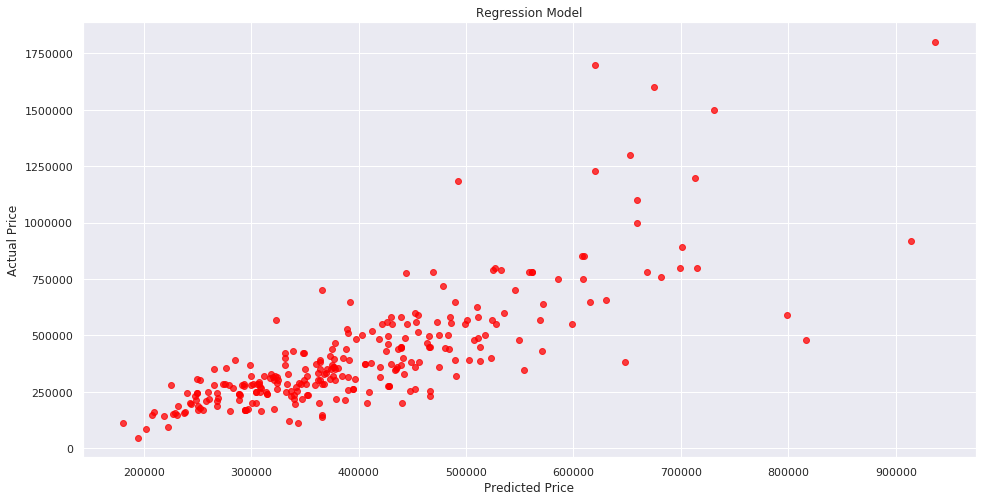

In [605]:
# Plotting the Predicted values and actual values to see how close they are
plt.scatter(predicted, YC_test, alpha=.75, color='red') # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Regression Model')